# Final Project - Heart Failure Prediction

## EDA
- Age: distribution looks ok.
- Sex: There are many men comparing to women.
- Chest Pain Type: Most people do not suffer from chest pain.
- Resting BP:
- Cholesterol: Many people have zero cholesterol. This does not make sense.
- Blood sugar: Most people does not have high blood sugar.
- ECG: Most people have normal ST.
- MaxHR: looks normal, around 135.
- Angina: Most people do not have angina.
- OldPeak: Most people do not have ST elevation.
- ST slope: ok.
- Output: looks 50-50, there are a bit more diseased people.

In [14]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: module 'numba' has no attribute 'generated_jit'

In [4]:
# data load
data = pd.read_csv('data.csv')

In [5]:
# data preview
print(f'head: {data.head()}')
print(f'tail: {data.tail()}')
print(f'shape: {data.shape}')

head:    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
tail:      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144      

In [6]:
# column data type
print(data.info()) # There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [7]:
# data statistics - numerical
print(data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [12]:
# data statistics - categorical
print(data.describe(include='object'))

        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


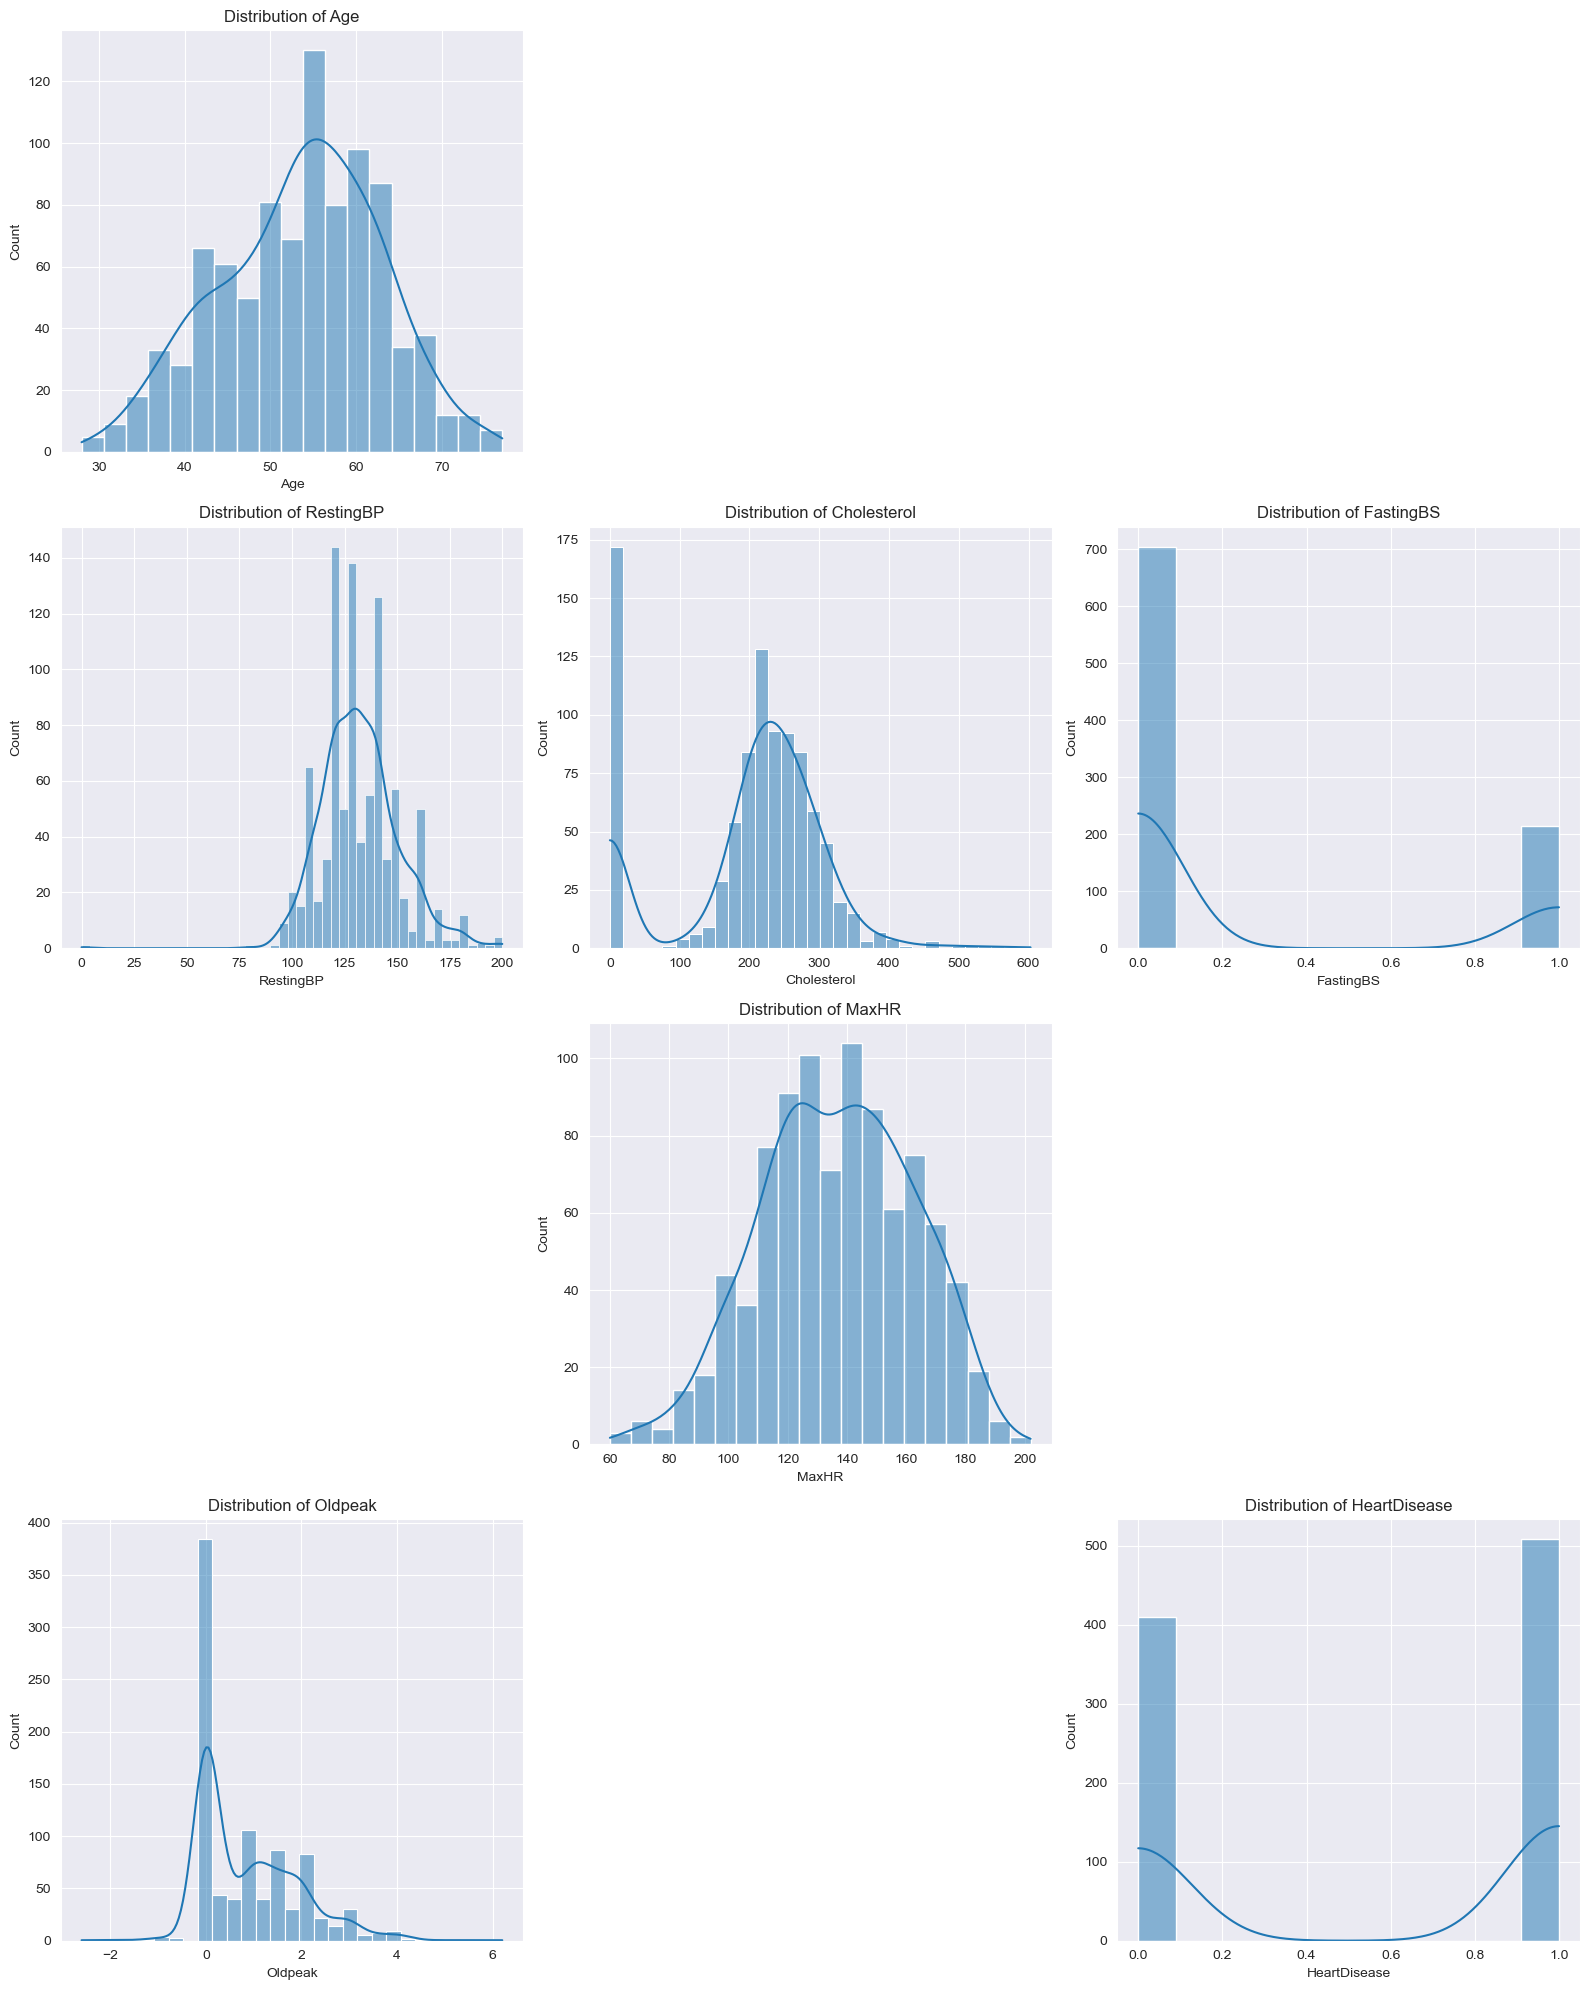

In [8]:
columns = data.columns  # Get all column names

# Define the number of rows and columns for the grid
num_cols = len(columns)
n_cols = 3  # Number of plots per row
n_rows = (num_cols // n_cols) + (num_cols % n_cols > 0)

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()  # Flatten axes array to iterate easily

# Plot each column
for i, column in enumerate(columns):
    if data[column].dtype in ['int64', 'float64']:  # Only plot numerical columns
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        axes[i].set_visible(False)  # Hide unused axes

# Remove extra subplots
for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

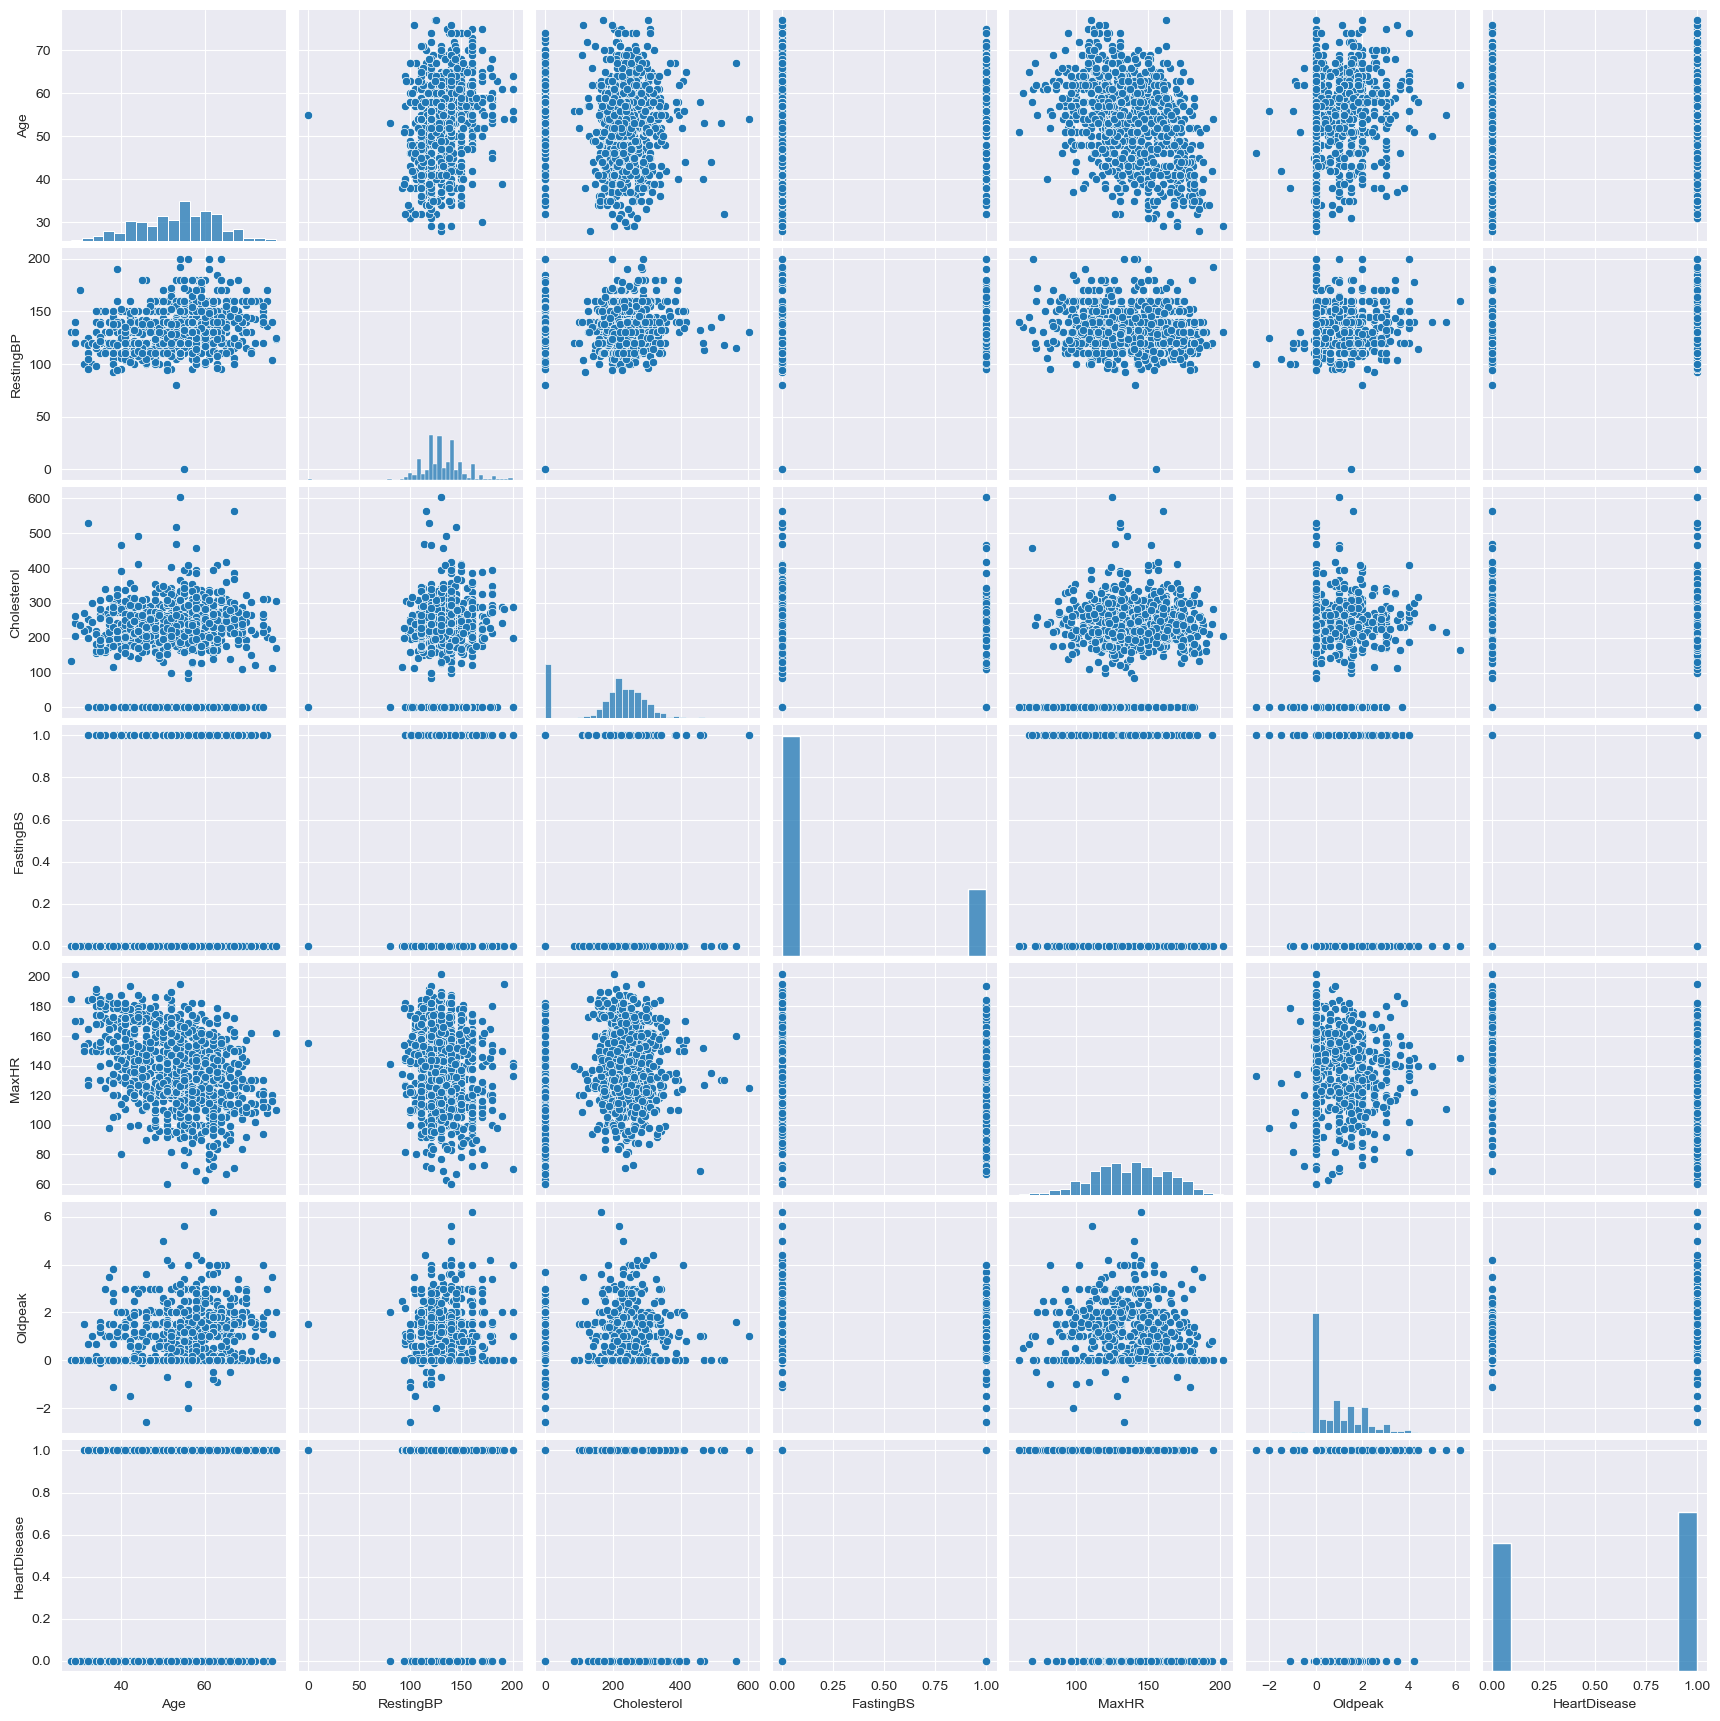

In [15]:
# Multivariante analysis
sns.pairplot(data)
plt.show()